D-Tree: 0.93

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
dataPath = '../../preprocess_data_set/w2v_vec250.csv'

df_train = pd.read_csv(dataPath)
df_train.shape

(44898, 251)

In [3]:
# randomly shuffle the rows
df_train = df_train.sample(frac=1, random_state=42)

df_train = df_train.reset_index()
df_train = df_train.drop('index', axis=1)
df_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,target
0,16.491493,95.172600,56.424232,-68.599670,-60.912342,7.188227,-13.449571,97.102104,-82.553505,-21.996725,...,-70.748657,19.197559,107.534119,-35.678185,11.226527,82.967758,-24.779600,17.169485,5.379145,1
1,-72.118202,27.964672,-7.027583,10.027310,-131.827057,-7.486910,-44.090725,133.783813,-194.863373,17.914831,...,-60.451050,107.544975,108.068588,-26.898706,78.787643,99.118088,-22.362482,73.297134,-33.535873,1
2,3.756721,-40.062057,68.558792,-42.674545,-109.676819,-14.668758,-28.305134,51.749004,-50.748463,-13.276784,...,-41.899300,57.503399,69.499634,-32.050545,-4.113337,68.741402,-36.689514,62.024269,-38.039894,1
3,-5.599266,18.342928,7.739429,-44.109142,-22.294226,20.409508,-6.085033,5.827918,1.943156,-9.718429,...,5.241331,14.465764,17.903656,-52.080715,27.857340,58.687279,-32.958290,16.111702,3.400345,0
4,-15.102126,-2.364689,-13.435221,-36.039989,-36.147312,-1.247078,-7.055103,24.922768,-67.551460,-39.405941,...,10.585206,34.318207,20.174820,-13.226823,-8.740134,27.602730,3.126579,42.755436,-10.994482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,60.789886,29.569677,43.278191,-118.951492,93.608200,48.588161,14.821746,34.658852,-32.712147,36.027985,...,-86.828911,18.453732,34.973248,-5.923214,41.222439,73.040588,-30.472477,45.009151,-43.001385,0
44894,-36.097504,-40.508411,1.085567,-5.865716,-61.894810,6.040255,30.072403,59.028919,-48.924541,-14.242128,...,-12.034688,33.752903,11.723240,-10.884808,-36.227303,1.101705,-45.026833,18.150423,-5.883533,1
44895,59.211033,2.794413,25.503954,-22.656900,-72.267227,-49.418575,-19.126442,35.768223,-35.190441,8.482786,...,-14.868692,-22.925610,-12.410628,-65.246872,-4.386832,60.229225,-41.607170,68.239143,-20.501524,1
44896,71.339561,16.005495,51.056477,-179.901749,-14.259531,126.382141,-4.463017,42.901329,53.434349,-14.907699,...,-106.613243,-39.113091,48.542309,-67.660194,58.561333,206.557541,-90.538963,154.817764,-92.831696,0


In [4]:
train_y = df_train['target']
train_x = df_train.drop(columns=['target'])

In [29]:
# Create a PCA object with 2 components
pca_2 = PCA(n_components=2)

# Fit the PCA model to the data
pca_2.fit(train_x)

# Transform the data into the new 2D space
X_pca = pca_2.transform(train_x)

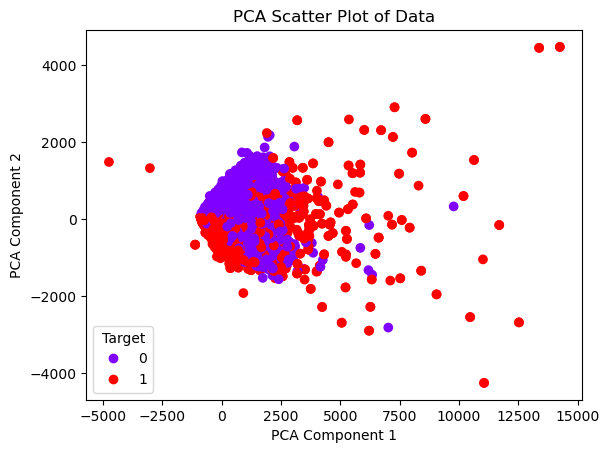

In [30]:
# Plot the scatter graph
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=train_y, cmap='rainbow')

# Add a legend to the plot
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Target")

ax.set_title("PCA Scatter Plot of Data")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")

plt.show()

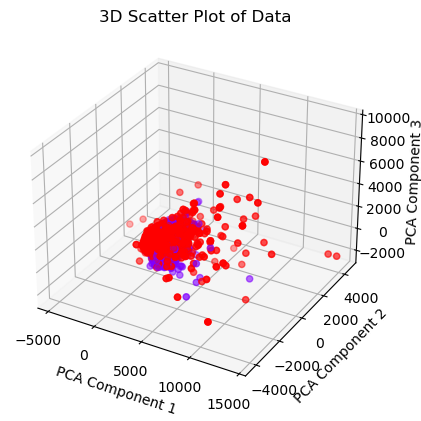

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Create a PCA object with 3 components
pca_3 = PCA(n_components=3)

pca_3.fit(train_x)

# Transform the data into the new 3D space
X_pca = pca_3.transform(train_x)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=train_y, cmap='rainbow')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Scatter Plot of Data')

plt.show()

In [ ]:
# # Create a BaggingClassifier object with a DecisionTreeClassifier base estimator
# clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
# # Fit the classifier to the data
# clf.fit(train_x, train_y)

In [35]:
pca_50 = PCA(n_components=50)
train_x_pca = pca_50.fit_transform(train_x)

In [38]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

C:\Users\lucas\AppData\Local\Temp\ipykernel_15472\520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


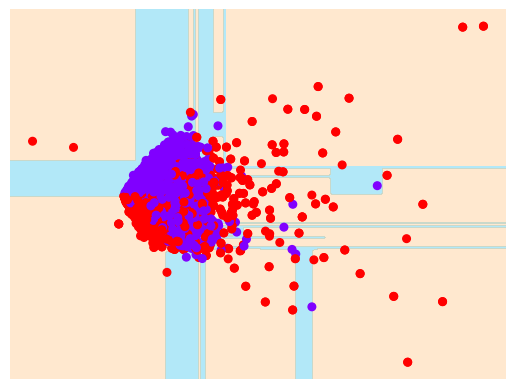

In [39]:
visualize_classifier(DecisionTreeClassifier(), X_pca, train_y)

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [18]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [20]:
y_pred = tree.predict(X_test)

In [22]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6264
           1       0.94      0.91      0.93      7206

    accuracy                           0.92     13470
   macro avg       0.92      0.92      0.92     13470
weighted avg       0.92      0.92      0.92     13470



In [5]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

tree_cv = DecisionTreeClassifier()

scores = cross_val_score(tree_cv, train_x, train_y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.9214922  0.91648107 0.91681514 0.92114935 0.91869919]
Average CV Score:  0.9189273908359793
